<a href="https://colab.research.google.com/github/DominteEmanuelBeniamin/PMP/blob/main/PARTIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

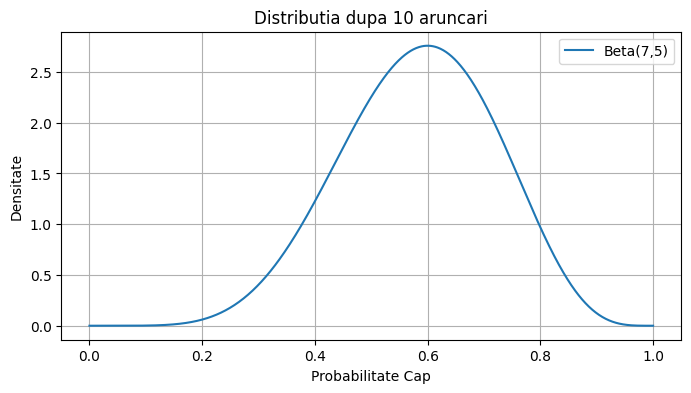

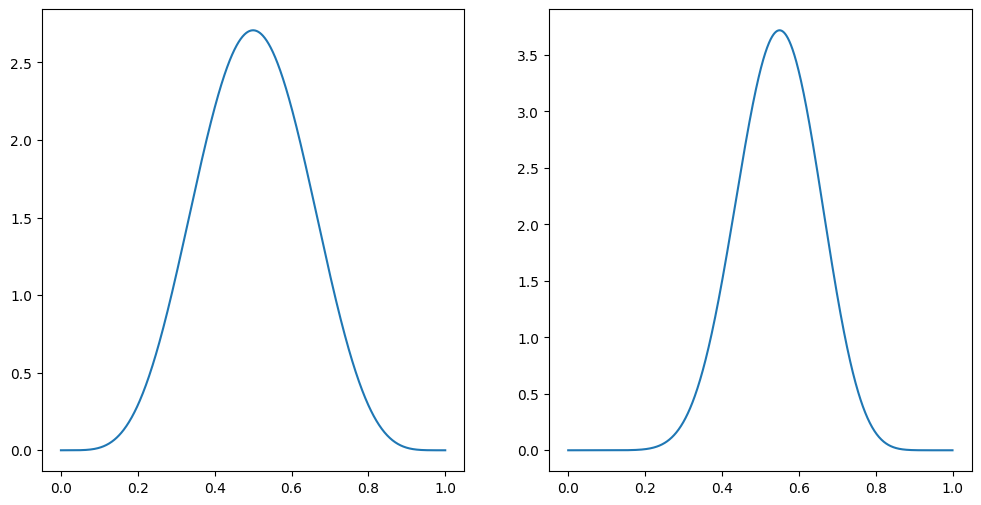

In [38]:
##################################
#SUBIECTUL 3 SUBPUNCT 1,2 ; Cel de sus este punctul 1 iar cele de jos sunt stanga a dreapta b
##################################


import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

coin_tosses = ['s', 's', 'b', 'b', 's', 's', 's', 's', 'b', 'b']
s = coin_tosses.count('s')
b = coin_tosses.count('b')

alpha_prior = 1
beta_prior = 1

alpha_post = alpha_prior + s
beta_post = beta_prior + b

x = np.linspace(0, 1, 1000)
y = stats.beta.pdf(x, alpha_post, beta_post)

plt.figure(figsize=(8, 4))
plt.plot(x, y, label=f'Beta({alpha_post},{beta_post})')
plt.title('Distributia dupa 10 aruncari')
plt.xlabel('Probabilitate Cap')
plt.ylabel('Densitate')
plt.legend()
plt.grid(True)
plt.show()


additional_tosses = ['b', 'b', 's', 'b', 's', 's', 'b', 's', 's', 'b']
s = additional_tosses.count('s')
f = additional_tosses.count('b')

alpha_prior_a = 1
beta_prior_a = 1
alpha_post_a = alpha_prior_a + s
beta_post_a = beta_prior_a + f

alpha_prior_b = alpha_post
beta_prior_b = beta_post
alpha_post_b = alpha_prior_b + s
beta_post_b = beta_prior_b + f

x = np.linspace(0, 1, 1000)
y_a = stats.beta.pdf(x, alpha_post_a, beta_post_a)
y_b = stats.beta.pdf(x, alpha_post_b, beta_post_b)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, y_a, label='a')
plt.subplot(1, 2, 2)
plt.plot(x, y_b, label='b')
plt.show()

# In cazul a, distributia este mai lata deoarece pleaca de la o distributie a priori uniforma.
# In cazul b, distributia este mai ingusta si concentrata, combinand informatia a priori din experimentul precedent cu datele noi.




https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


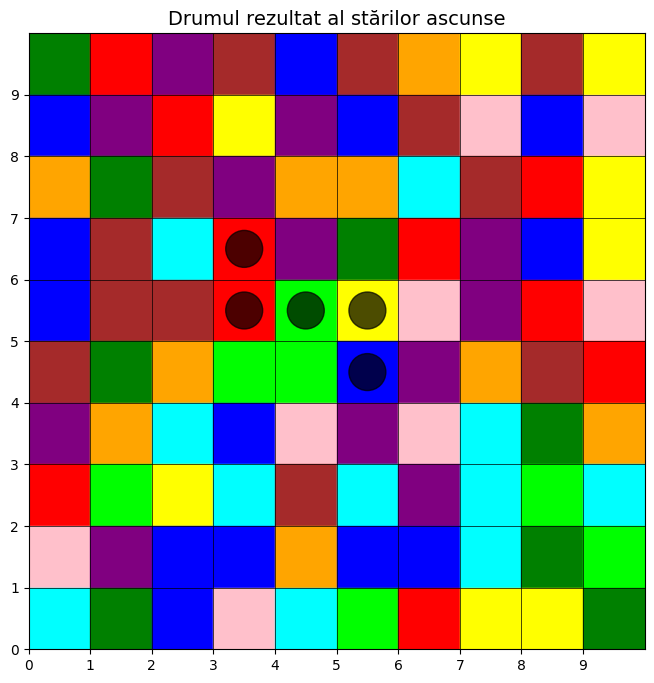

In [35]:
##################################
#SUBIECTUL 1 SUBPUNCT 1
##################################



from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dimensiune_grid = (10, 10)
culori = ["red", "blue", "green", "yellow", "purple", "orange", "pink", "cyan", "brown", "lime"]

df = pd.read_csv('grid_culori.csv', header=None)
grid_culori = df.values.reshape(dimensiune_grid)

observatii = ['red', 'red', 'lime', 'yellow', 'blue']
culoare_to_idx = {culoare: idx for idx, culoare in enumerate(culori)}

observatii_matrix = np.zeros((len(observatii), len(culori)), dtype=int)
for i, obs in enumerate(observatii):
    observatii_matrix[i, culoare_to_idx[obs]] = 1

numar_stari = dimensiune_grid[0] * dimensiune_grid[1]
stari_ascunse = [(i, j) for i in range(dimensiune_grid[0]) for j in range(dimensiune_grid[1])]
stare_to_idx = {stare: idx for idx, stare in enumerate(stari_ascunse)}

transitions = np.zeros((numar_stari, numar_stari))
for i, j in stari_ascunse:
    vecini = [(i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1)]
    for vecin in vecini:
        if 0 <= vecin[0] < 10 and 0 <= vecin[1] < 10:
            transitions[stare_to_idx[(i, j)], stare_to_idx[vecin]] = 1 / len(vecini)
transitions /= transitions.sum(axis=1, keepdims=True)

emissions = np.zeros((numar_stari, len(culori)))
for i in range(dimensiune_grid[0]):
    for j in range(dimensiune_grid[1]):
        state_idx = stare_to_idx[(i, j)]
        color_idx = culoare_to_idx[grid_culori[i, j]]
        emissions[state_idx, color_idx] = 1

model = hmm.MultinomialHMM(n_components=numar_stari, n_iter=100, n_trials=1)
model.startprob_ = np.ones(numar_stari) / numar_stari
model.transmat_ = transitions
model.emissionprob_ = emissions

logprob, states = model.decode(observatii_matrix, algorithm="viterbi")
path = [idx_to_stare[state] for state in states]

fig, ax = plt.subplots(figsize=(8, 8))
for i in range(dimensiune_grid[0]):
    for j in range(dimensiune_grid[1]):
        ax.add_patch(plt.Rectangle((j, dimensiune_grid[0] - i - 1), 1, 1, color=grid_culori[i, j]))
for idx, (i, j) in enumerate(path):
    ax.add_patch(plt.Circle((j + 0.5, dimensiune_grid[0] - i - 0.5), 0.3, color="black", alpha=0.7))
ax.set_xlim(0, dimensiune_grid[1])
ax.set_ylim(0, dimensiune_grid[0])
ax.set_xticks(range(dimensiune_grid[1]))
ax.set_yticks(range(dimensiune_grid[0]))
ax.grid(visible=True, color="black", linewidth=0.5)
ax.set_aspect("equal")
plt.title("Drumul rezultat al stărilor ascunse", fontsize=14)
plt.show()


https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


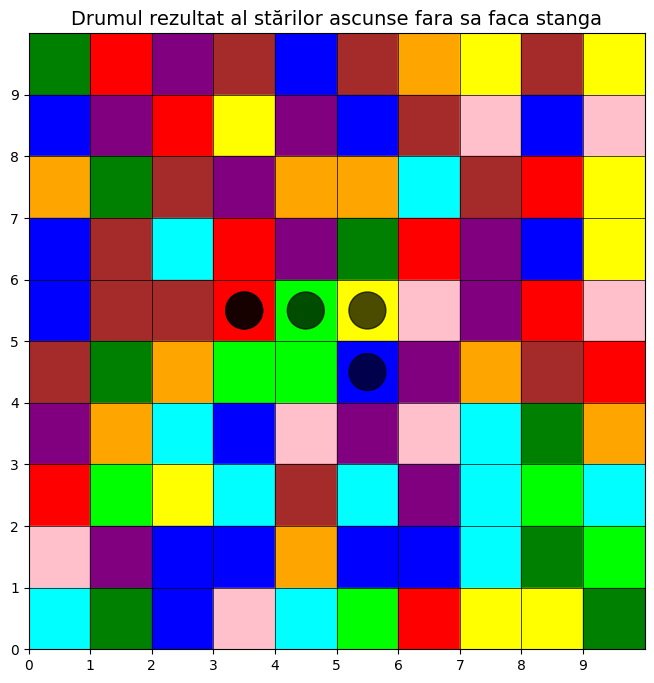

In [37]:
##################################
#SUBIECTUL 1 SUBPUNCT 2
##################################




from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dimensiune_grid = (10, 10)
culori = ["red", "blue", "green", "yellow", "purple", "orange", "pink", "cyan", "brown", "lime"]

df = pd.read_csv('grid_culori.csv', header=None)
grid_culori = df.values.reshape(dimensiune_grid)

observatii = ['red', 'red', 'lime', 'yellow', 'blue']
culoare_to_idx = {culoare: idx for idx, culoare in enumerate(culori)}

observatii_matrix = np.zeros((len(observatii), len(culori)), dtype=int)
for i, obs in enumerate(observatii):
    observatii_matrix[i, culoare_to_idx[obs]] = 1

numar_stari = dimensiune_grid[0] * dimensiune_grid[1]
stari_ascunse = [(i, j) for i in range(dimensiune_grid[0]) for j in range(dimensiune_grid[1])]
stare_to_idx = {stare: idx for idx, stare in enumerate(stari_ascunse)}

transitions = np.zeros((numar_stari, numar_stari))
for i, j in stari_ascunse:
    vecini = []
    if i > 0:
        vecini.append((i - 1, j))
    if i < dimensiune_grid[0] - 1:
        vecini.append((i + 1, j))
    if j < dimensiune_grid[1] - 1:
        vecini.append((i, j + 1))
    vecini.append((i, j))
    for vecin in vecini:
        transitions[stare_to_idx[(i, j)], stare_to_idx[vecin]] = 1 / len(vecini)

emissions = np.zeros((numar_stari, len(culori)))
for i in range(dimensiune_grid[0]):
    for j in range(dimensiune_grid[1]):
        state_idx = stare_to_idx[(i, j)]
        color_idx = culoare_to_idx[grid_culori[i, j]]
        emissions[state_idx, color_idx] = 1

model = hmm.MultinomialHMM(n_components=numar_stari, n_iter=100, n_trials=1)
model.startprob_ = np.ones(numar_stari) / numar_stari
model.transmat_ = transitions
model.emissionprob_ = emissions

logprob, states = model.decode(observatii_matrix, algorithm="viterbi")
path = [idx_to_stare[state] for state in states]

fig, ax = plt.subplots(figsize=(8, 8))
for i in range(dimensiune_grid[0]):
    for j in range(dimensiune_grid[1]):
        ax.add_patch(plt.Rectangle((j, dimensiune_grid[0] - i - 1), 1, 1, color=grid_culori[i, j]))
for idx, (i, j) in enumerate(path):
    ax.add_patch(plt.Circle((j + 0.5, dimensiune_grid[0] - i - 0.5), 0.3, color="black", alpha=0.7))
ax.set_xlim(0, dimensiune_grid[1])
ax.set_ylim(0, dimensiune_grid[0])
ax.set_xticks(range(dimensiune_grid[1]))
ax.set_yticks(range(dimensiune_grid[0]))
ax.grid(visible=True, color="black", linewidth=0.5)
ax.set_aspect("equal")
plt.title("Drumul rezultat al stărilor ascunse fara sa faca stanga", fontsize=14)
plt.show()
